In [ ]:
https://www.geeksforgeeks.org/linear-regression-python-implementation/

go to this [link](https://www.geeksforgeeks.org/linear-regression-python-implementation/) for linear regression walkthrough

Coefficients:  [-0.10305121  0.01863759]
Variance score: 0.7300185823149714


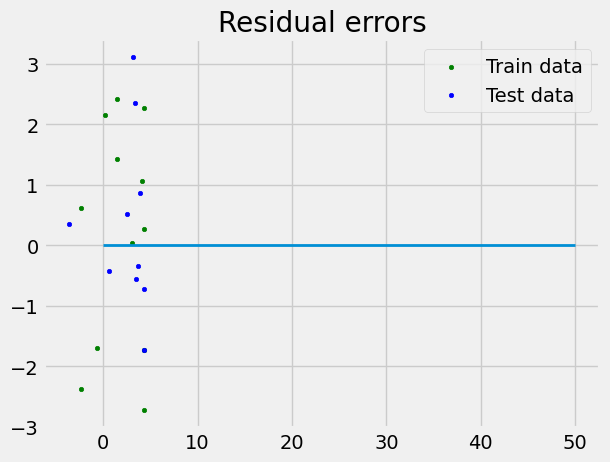

In [25]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, metrics
 
# load the boston dataset
sparkrawdf = pd.read_csv('../data/GolfAnalysis - Spark10.10.csv')
raw_df = sparkrawdf.drop(sparkrawdf[(sparkrawdf['ROUND']) == 'Brookshire'].index)
raw_df = raw_df.dropna(subset=['SCORE'])
raw_df['SCORE'] = raw_df['SCORE'].replace('E','0')
raw_df['SCORE'] = raw_df['SCORE'].astype(int)
raw_df['BEST 10'] = raw_df['BEST 10'].fillna(0)
raw_df.dtypes

X = raw_df[['PTS','BEST 10']].to_numpy()
y = raw_df.SCORE.to_numpy()
 
# splitting X and y into training and testing sets
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.4,
                                       random_state=1)
 
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
# setting plot style
plt.style.use('fivethirtyeight')
 
# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')
 
# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
 
# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("Residual errors")
 
# method call for showing the plot
plt.show()

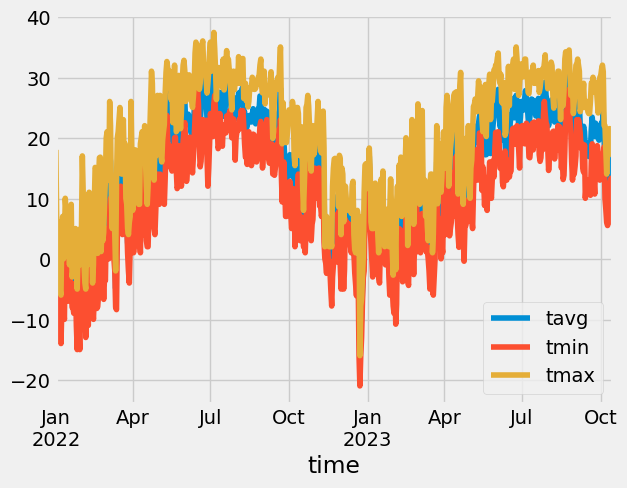

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
648,2023-10-11,13.5,6.4,21.6,6.6,NaN,179.0,11.8,NaN,1010.3,NaN
649,2023-10-12,17.0,12.8,21.6,0.0,NaN,170.0,16.6,NaN,1007.4,NaN
650,2023-10-13,16.3,13.4,18.6,5.6,NaN,151.0,20.8,NaN,1007.5,NaN
651,2023-10-14,14.7,11.3,19.0,NaN,NaN,280.0,16.4,NaN,1012.3,NaN
652,2023-10-15,13.3,9.7,17.3,NaN,NaN,302.0,15.1,NaN,1016.6,NaN


In [30]:
from meteostat import Point, Daily
from datetime import datetime

# Set time period
start = datetime(2022, 1, 1)
end = datetime(2023, 12, 31)

# Create Point for Vancouver, BC
location = Point(39.5842, -86.0711, 70)

# Get daily data for 2018
data = Daily(location, start, end)
data = pd.DataFrame(data.fetch())

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

# COMMAND ----------

# MAGIC %md
# MAGIC Temperatures are in celsius.

# COMMAND ----------

data.reset_index(level=0, inplace=True)

data.tail()

## Temperatures are in celcius

```
C * 1.8 + 32 = F
```